In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [3]:
df = pd.read_csv('/content/worldcities.csv' , encoding='utf-8')
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1.392686e+09
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1.360771e+09
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1.356873e+09
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1.156237e+09
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1.356227e+09


In [4]:
print(df.columns)


Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')


In [5]:
df.sample(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
9386,Lysva,Lysva,58.1003,57.8042,Russia,RU,RUS,Permskiy Kray,NaN,61752.0,1.643566e+09
4827,Abiko,Abiko,35.8667,140.0333,Japan,JP,JPN,Chiba,NaN,130290.0,1.392000e+09
17068,Sakhnīn,Sakhnin,32.8667,35.3000,Israel,IL,ISR,Northern,NaN,31100.0,1.376646e+09
10393,Bhīmunipatnam,Bhimunipatnam,17.8846,83.4393,India,IN,IND,Andhra Pradesh,NaN,55082.0,1.356889e+09
11988,Quinte West,Quinte West,44.1833,-77.5667,Canada,CA,CAN,Ontario,NaN,46560.0,1.124001e+09
9983,Maduraivayal,Maduraivayal,13.0631,80.1719,India,IN,IND,Tamil Nādu,NaN,57563.0,1.356037e+09
12974,Beverly,Beverly,42.5681,-70.8627,United States,US,USA,Massachusetts,NaN,42414.0,1.840000e+09
16579,Koungou,Koungou,-12.7385,45.2071,Mayotte,YT,MYT,NaN,NaN,32156.0,1.175080e+09
665,Aba,Aba,5.1167,7.3667,Nigeria,NG,NGA,Abia,minor,1160000.0,1.566262e+09
15576,Mugnano di Napoli,Mugnano di Napoli,40.9167,14.2000,Italy,IT,ITA,Campania,NaN,34607.0,1.380873e+09


In [26]:
df.isnull().sum()
# to know the null in each column

,0
city,0
city_ascii,0
lat,0
lng,0
country,0
iso2,0
iso3,0
admin_name,0
capital,0
population,0


In [25]:
df['population'] = df['population'].fillna(df['population'].mean())
df['iso2'] = df['iso2'].fillna("Unknown")
df['admin_name'] = df['admin_name'].fillna("Not Specified")
df['capital'] = df['capital'].fillna(df['capital'].mode()[0])
df['city_ascii'] = df['city_ascii'].fillna(df['city_ascii'].mode()[0]) #.mode()[0] معماها أكثر قيمة تكرارًا في العمود.
df['id'] = df['id'].fillna(method='ffill')
df['id'] = range(1, len(df)+1)



<ipython-input-25-517703a2642a>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id'] = df['id'].fillna(method='ffill')  # أو تعملي ID جديد:


In [8]:
df = df.drop_duplicates()


In [9]:
df.duplicated().sum()

np.int64(0)

Data Exploration (EDA)

In [10]:
df.describe()

,lat,lng,population,id
count,19816.000000,19816.000000,1.981600e+04,1.981500e+04
mean,24.066974,22.580518,2.419527e+05,1.444806e+09
std,22.044500,74.907149,1.049169e+06,2.627700e+08
min,-54.801900,-171.750000,2.608100e+04,1.004003e+09
25%,11.233075,-45.374900,3.640100e+04,1.204991e+09
50%,28.455550,24.709450,5.812350e+04,1.392003e+09
75%,40.384600,82.154875,1.268600e+05,1.643847e+09
max,70.767000,179.370300,3.773200e+07,1.934947e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19816 entries, 0 to 19815
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        19816 non-null  object 
 1   city_ascii  19816 non-null  object 
 2   lat         19816 non-null  float64
 3   lng         19816 non-null  float64
 4   country     19816 non-null  object 
 5   iso2        19816 non-null  object 
 6   iso3        19816 non-null  object 
 7   admin_name  19816 non-null  object 
 8   capital     19816 non-null  object 
 9   population  19816 non-null  float64
 10  id          19815 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.7+ MB


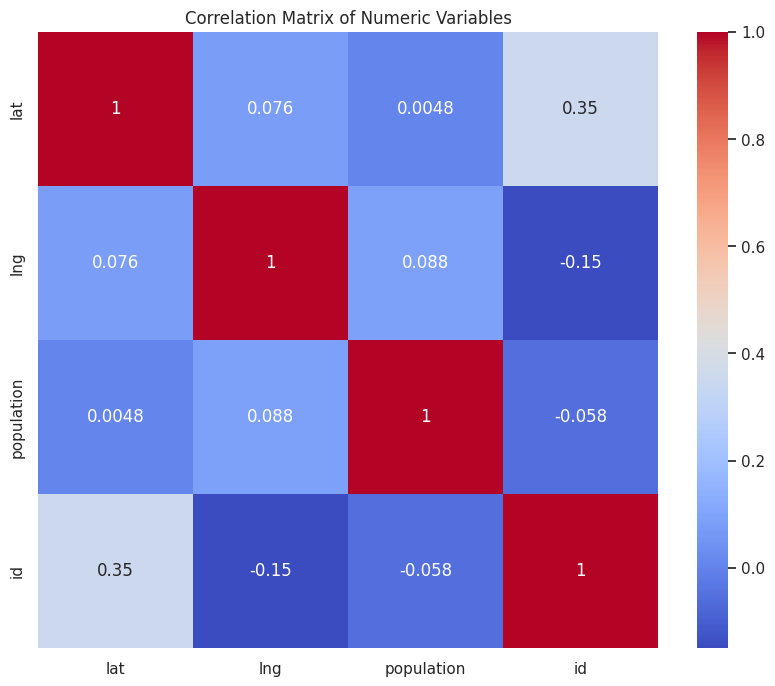

In [12]:
df_numeric = df.select_dtypes(include=['number']) #عشان corrمع ال numbers بس

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


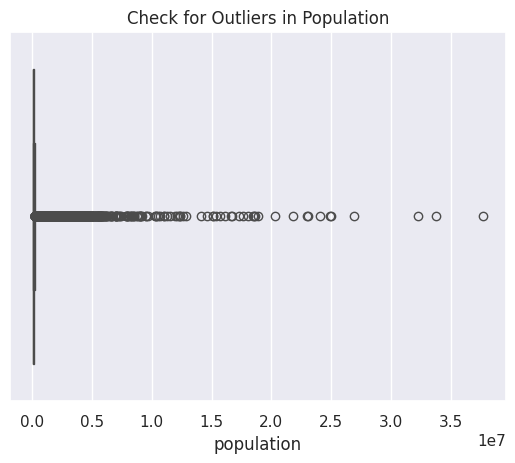

In [13]:
sns.boxplot(x=df['population'])
plt.title("Check for Outliers in Population")
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize الأعمدة الرقمية
scaler = MinMaxScaler()
df[['lat', 'lng', 'population']] = scaler.fit_transform(df[['lat', 'lng', 'population']])#بنستخدم MinMaxScaler علشان نطبّق Normalization
#الهدف إن القيم تبقى بين 0 و 1 بدل أرقام كبيرة.

# Encode الأعمدة الفئوية (مثلاً: capital, iso2)
encoder = LabelEncoder()
df['capital_encoded'] = encoder.fit_transform(df['capital'])
df['iso2_encoded'] = encoder.fit_transform(df['iso2'])
#لأعمدة النصية زي capital و iso2 مش هتنفع تدخل على نموذج Machine Learning لأنها Strings.
#ف بنحوّلهم لأرقام باستخدامlLabelEncoder.


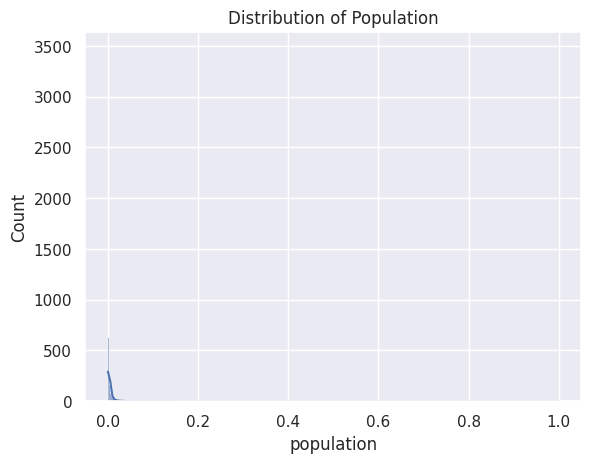

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# توزيعات
sns.histplot(df['population'], kde=True)
plt.title('Distribution of Population')
plt.show()


<ipython-input-27-62cbf54c9387>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='capital', y='population', palette='Set2')


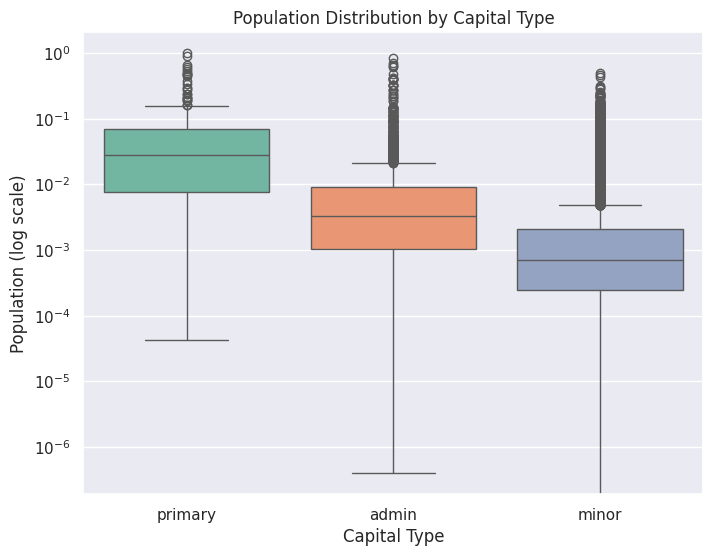

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='capital', y='population', palette='Set2')
plt.yscale('log') # log bec: diff bet. population is larg
plt.title('Population Distribution by Capital Type')
plt.xlabel('Capital Type')
plt.ylabel('Population (log scale)')
plt.show()


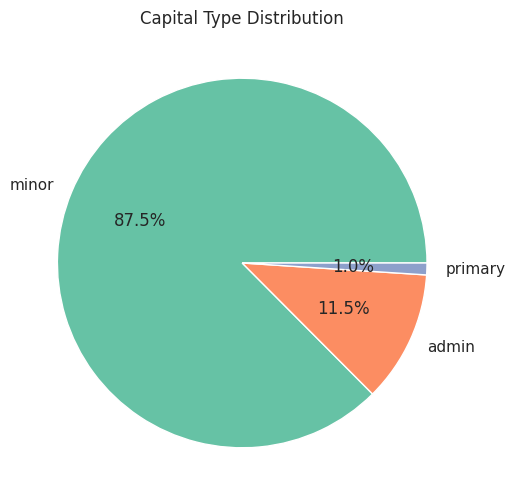

In [28]:
capital_counts = df['capital'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(capital_counts, labels=capital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Capital Type Distribution')
plt.show()


<ipython-input-29-4ccf50bf554b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


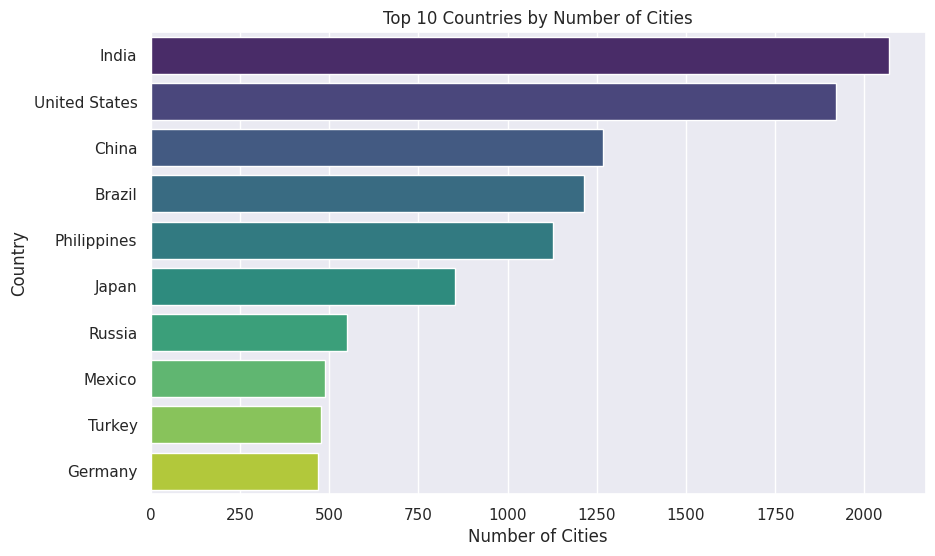

In [29]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Country')
plt.show()


<ipython-input-16-cd42fb96c045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='city', y='population', palette='viridis')


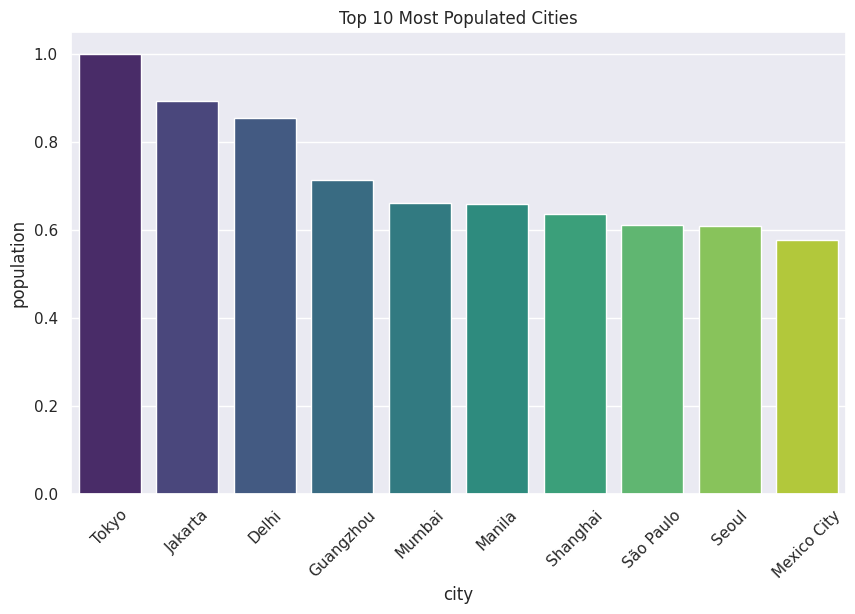

In [16]:
top_cities = df.sort_values('population', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='city', y='population', palette='viridis')
plt.title('Top 10 Most Populated Cities')
plt.xticks(rotation=45)
plt.show()


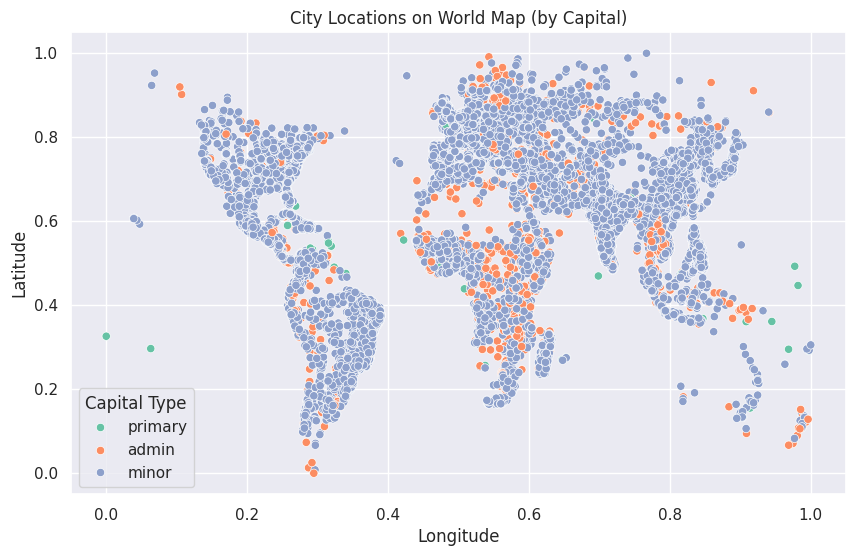

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='capital', palette='Set2')

plt.title('City Locations on World Map (by Capital)')
plt.ylabel('Latitude')
plt.legend(title='Capital Type')
plt.show()


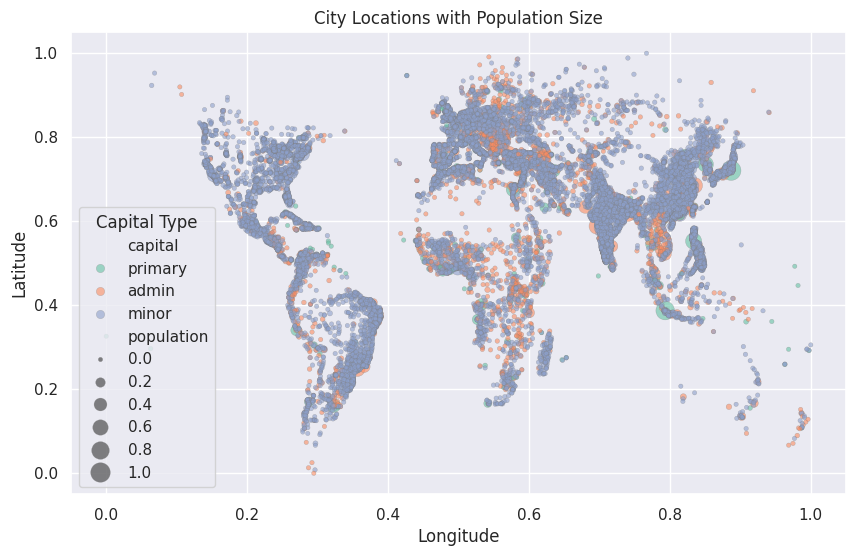

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='capital', size='population',
                sizes=(10, 200), palette='Set2', alpha=0.6, edgecolor='gray') #alpha for transpatent
plt.title('City Locations with Population Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Capital Type')
plt.show()


***(Insights):***

---

*   Countries like India, China, and Brazil host the most populated cities globally.
*  Not all primary capitals are the most populous cities (e.g., Washington vs. New York).


*  There’s a dense clustering of cities around specific longitude/latitude ranges (e.g., coastal areas).
* Administrative capitals form a significant portion of city distributions in
many large countries.



---
 **(Recommendations):**


---



*   Prioritize urban infrastructure development in non-capital but high-population cities.

* Use capital classification to define service zones (economic, administrative, ceremonial).  
*  Governments and urban planners can leverage this cleaned geospatial data to improve public service delivery.


*   Enable dynamic dashboards that integrate real-time population estimates with location data
